In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline

In [55]:
df = pd.read_csv('Car_sales_transactions.csv')
df.head(3)

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5


In [56]:
df.shape

(7906, 16)

In [57]:
df.columns

Index(['Sales_ID', 'Name', 'Year', 'Selling_Price', 'km_Driven', 'City_Code',
       'State_Code', 'Postal_Code', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner', 'Mileage', 'Engine', 'Max_Power', 'Seats'],
      dtype='object')

In [58]:
df.nunique()

Sales_ID         7906
Name             1982
Year               27
Selling_Price     670
km_Driven         898
City_Code          29
State_Code         18
Postal_Code        61
Fuel                4
Seller_Type         3
Transmission        2
Owner               5
Mileage           393
Engine            121
Max_Power         320
Seats               9
dtype: int64

In [59]:
main_categorical_col = ['Fuel','Seller_Type','Transmission','Owner']

for col in main_categorical_col:
    print(f"-----{col}------")
    print(df[col].value_counts())
    print()

-----Fuel------
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: Fuel, dtype: int64

-----Seller_Type------
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: Seller_Type, dtype: int64

-----Transmission------
Manual       6865
Automatic    1041
Name: Transmission, dtype: int64

-----Owner------
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: Owner, dtype: int64



<h1>DATA CLEANING</h1>

In [60]:
df.isnull().sum()

Sales_ID         0
Name             0
Year             0
Selling_Price    0
km_Driven        0
City_Code        0
State_Code       0
Postal_Code      0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Mileage          0
Engine           0
Max_Power        0
Seats            0
dtype: int64

In [61]:
df.Seats.describe()

count    7906.000000
mean        5.416393
std         0.959208
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: Seats, dtype: float64

In [62]:
df[df.Seats > 9][:4]

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats
585,605,Tata Sumo CX 10 Str BSIV,2011,175000,20000,CT17,ST07,391510,Diesel,Individual,Manual,First Owner,12.2 kmpl,1948 CC,68 bhp,10
768,796,Chevrolet Tavera Neo 3 LS 10 Str,2016,409999,60000,CT17,ST07,391510,Diesel,Individual,Manual,Second Owner,12.2 kmpl,1994 CC,105.3 bhp,10
2025,2087,Tata Sumo EX 10/7 Str BSIII,2012,200000,67500,CT23,ST12,574142,Diesel,Individual,Manual,First Owner,12.2 kmpl,1948 CC,68 bhp,10
2257,2332,Chevrolet Tavera Neo 3 10 Seats BSIII,2014,600000,110000,CT18,ST21,141003,Diesel,Individual,Manual,First Owner,13.58 kmpl,2499 CC,72.4 bhp,10


In [63]:
df[df.Seats == 14]

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats
4441,4576,Tata Winger Deluxe - Flat Roof (Non-AC),2010,235000,50000,CT06,ST22,302029,Diesel,Individual,Manual,First Owner,10.71 kmpl,1948 CC,90 bhp,14


- Thers is no outliers in case of <b>Seats</b>. And there exist some car models whose seating capcity is upto 14

<h1>DATA TRANSFORMATION</h1>

In [64]:
df2 = df.copy()

In [65]:
df2['Brand_name'] = df.Name.apply(lambda x : x.split(' ')[0])
df2['Model_name'] = df.Name.apply(lambda x : x.split(' ')[1])

In [66]:
df2.Brand_name.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [67]:
df2.Mileage[:7]

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
5    20.14 kmpl
6    17.3 km/kg
Name: Mileage, dtype: object

In [68]:
def convert_token_to_num(x):
    tokens = x.split(' ')
    if(len(tokens) == 2):
        return float(tokens[0])

In [69]:
df2['Mileage'] = df2['Mileage'].apply(convert_token_to_num)
df2.Mileage.head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: Mileage, dtype: float64

In [70]:
df2.Max_Power.head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: Max_Power, dtype: object

In [71]:
df2['Max_Power'] = df2['Max_Power'].apply(convert_token_to_num)
df2.Max_Power.head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: Max_Power, dtype: float64

In [72]:
df2['Engine'] = df2['Engine'].apply(convert_token_to_num).astype(int)
df2.Engine.head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: Engine, dtype: int32

In [73]:
print("Zero Mileage = ",df2.query("Mileage == 0.0")['Mileage'].count())
print("Zero Engine = ",df2.query("Engine == 0.0")['Engine'].count())
print("Zero Max_Power = ",df2.query("Max_Power == 0.0")['Max_Power'].count())

Zero Mileage =  17
Zero Engine =  0
Zero Max_Power =  0


In [74]:
# handling the zero mileage rows
df2.Mileage = df2.Mileage.map(lambda x : x if x!=0.0 else df2.Mileage.median())
print("Zero Mileage = ",df2.query("Mileage == 0.0")['Mileage'].count())

Zero Mileage =  0


In [26]:
df2.Owner = df2.Owner.apply(lambda x : x.split(' ')[0])

In [27]:
current_year = 2023
df2['car_age'] = current_year - df2['Year']

In [28]:
df2.head()

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats,Brand_name,Model_name,car_age
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,Manual,First,23.40,1248,74.00,5,Maruti,Swift,9
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,Manual,Second,21.14,1498,103.52,5,Skoda,Rapid,9
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,Manual,Third,17.70,1497,78.00,5,Honda,City,17
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,Manual,First,23.00,1396,90.00,5,Hyundai,i20,13
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,Manual,First,16.10,1298,88.20,5,Maruti,Swift,16


<h1>DATA VISUALIZATION</h1>

<h5>Quantitive Columns Plotting</h5>

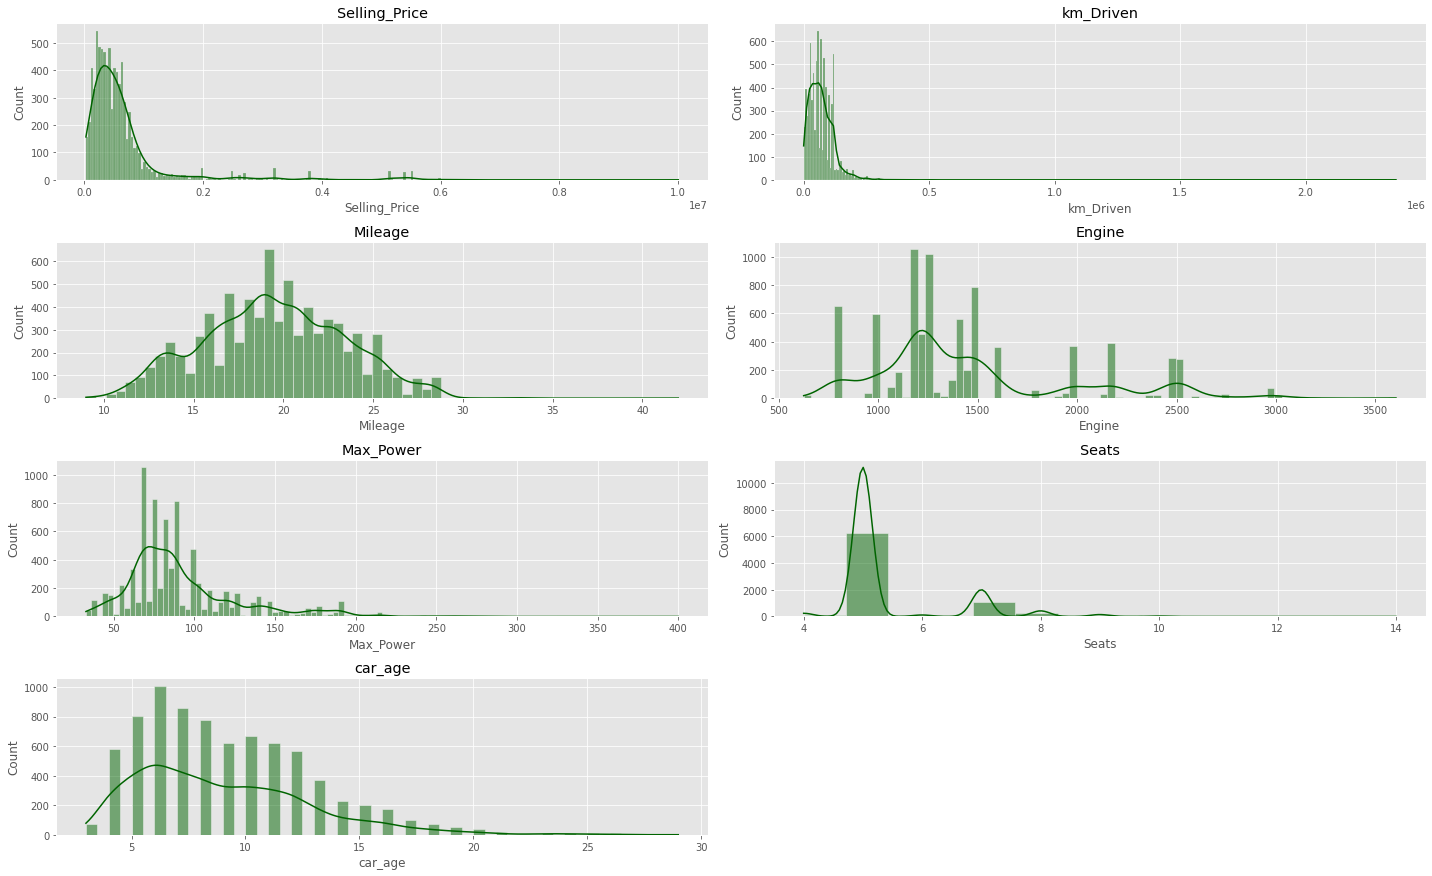

In [29]:
plt.style.use('ggplot')

columns = ['Selling_Price','km_Driven','Mileage','Engine','Max_Power','Seats','car_age']
plt.figure(figsize=(20,30))

for i, variable in enumerate(columns):
    plt.subplot(10,2,i+1)
    sn.histplot(df2[variable],kde=True,color='darkgreen')
    plt.tight_layout()
    plt.title(variable)

- Selling Price, km_Driven, Max_Power, Engine and Car_age are right skewed
- Mileage is Normally distributed

<h5>Categorical Columns Plotting</h5>

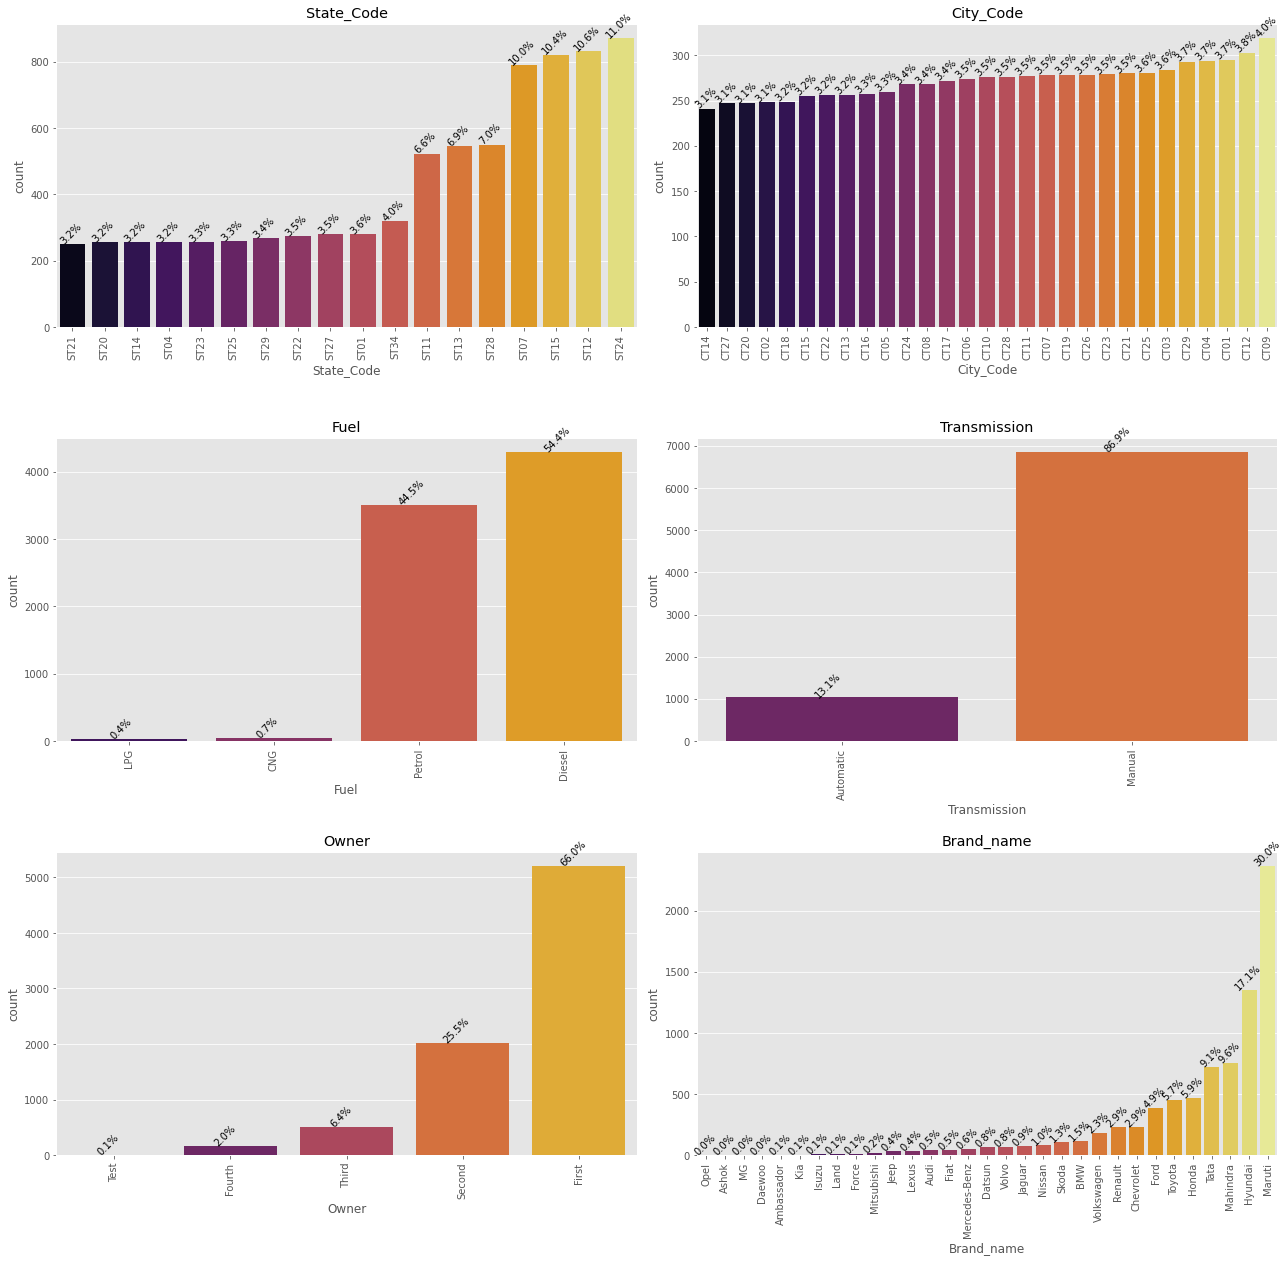

In [30]:
plt.figure(figsize=(18,22))
categorical_columns=['State_Code','City_Code','Fuel','Transmission', 'Owner', 'Brand_name'] 


for i, variable in enumerate(categorical_columns):
                     plt.subplot(4,2,i+1)
                     order = df2[variable].value_counts(ascending=True).index    
                     ax = sn.countplot(x=df2[variable], data=df2 , order=order, palette="inferno")
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df2[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height() +1
                           plt.annotate(percentage, (x, y),ha='center', rotation=45)
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

- 30% of car sold are of Maruti
- 66% of the cars sold are first owner
- 86.9% of the cars sold are of manual transmission
- 54% of the cars are deseil and 44.5% are Petrol

In [31]:
# plt.figure(figsize=(15,25))
# curated_col = ['Brand_name','car_age','km_Driven','Fuel','Seller_Type','Transmission','Owner','Engine','Max_Power','Seats']

# for i, variable in enumerate(curated_col):
#                      plt.subplot(5,3,i+1)
#                      sn.scatterplot(x=df2[variable],y=df2['Selling_Price'], color='darkblue').set(title='Selling_Price vs '+ variable)
#                      plt.tight_layout()

<h1>EDA</h1>

<AxesSubplot:xlabel='Seats', ylabel='Selling_Price'>

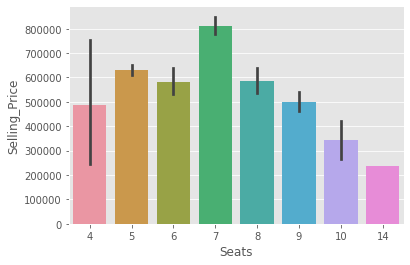

In [32]:
sn.barplot(x='Seats', y='Selling_Price', data=df2)

<AxesSubplot:xlabel='Selling_Price', ylabel='City_Code'>

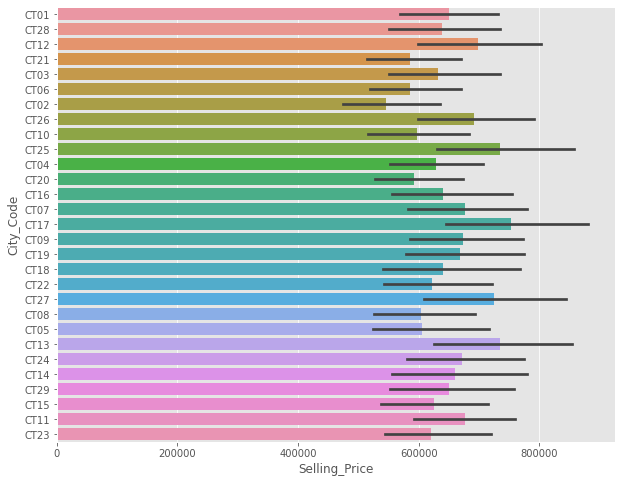

In [33]:
plt.figure(figsize=(10,8))
sn.barplot(x='Selling_Price', y='City_Code', data=df2)

<AxesSubplot:xlabel='Selling_Price', ylabel='State_Code'>

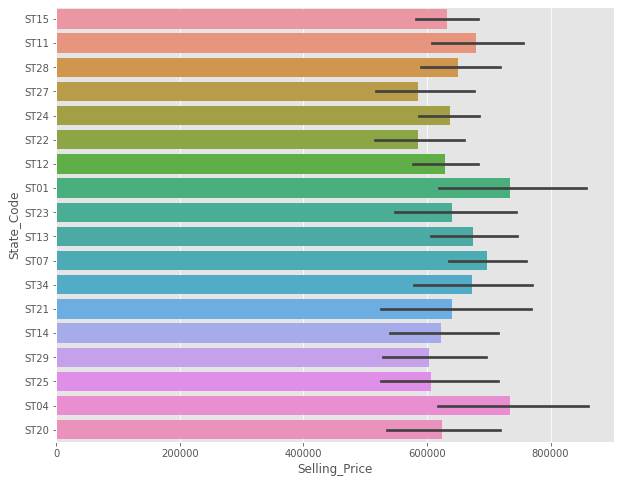

In [34]:
plt.figure(figsize=(10,8))
sn.barplot(x='Selling_Price', y='State_Code', data=df2)

<AxesSubplot:xlabel='Mileage', ylabel='Selling_Price'>

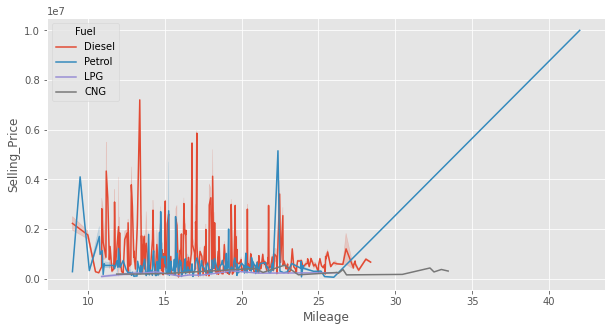

In [35]:
plt.figure(figsize=(10,5))
sn.lineplot(data=df2, y='Selling_Price',x='Mileage',hue='Fuel')

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

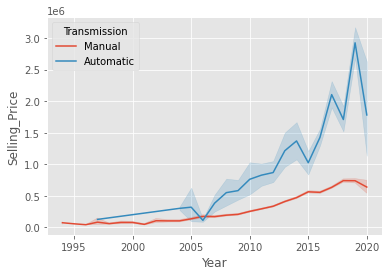

In [36]:
sn.lineplot(x='Year', y='Selling_Price',hue='Transmission',data=df2)

<AxesSubplot:xlabel='Mileage', ylabel='Selling_Price'>

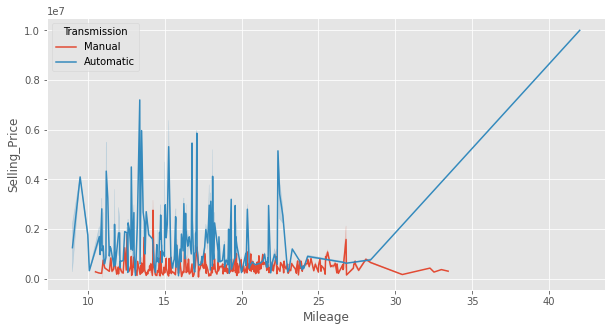

In [37]:
plt.figure(figsize=(10,5))
sn.lineplot(data=df2, y='Selling_Price',x='Mileage',hue='Transmission')

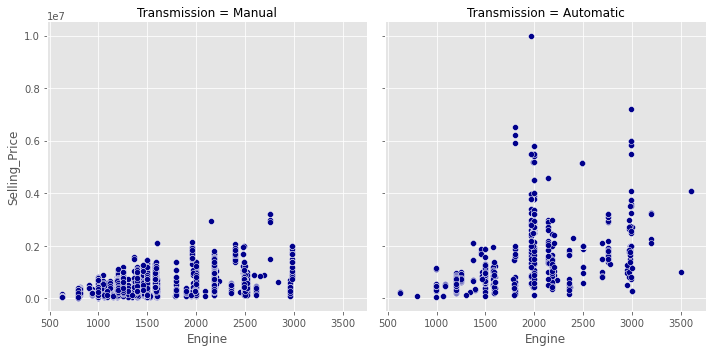

In [38]:
sn.relplot(data=df2, y='Selling_Price',x='Engine', col='Transmission', color='darkblue')

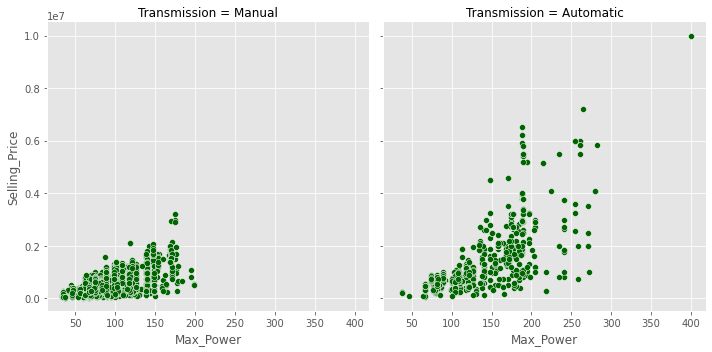

In [39]:
sn.relplot(data=df2, y='Selling_Price',x='Max_Power', col='Transmission', color='darkgreen')

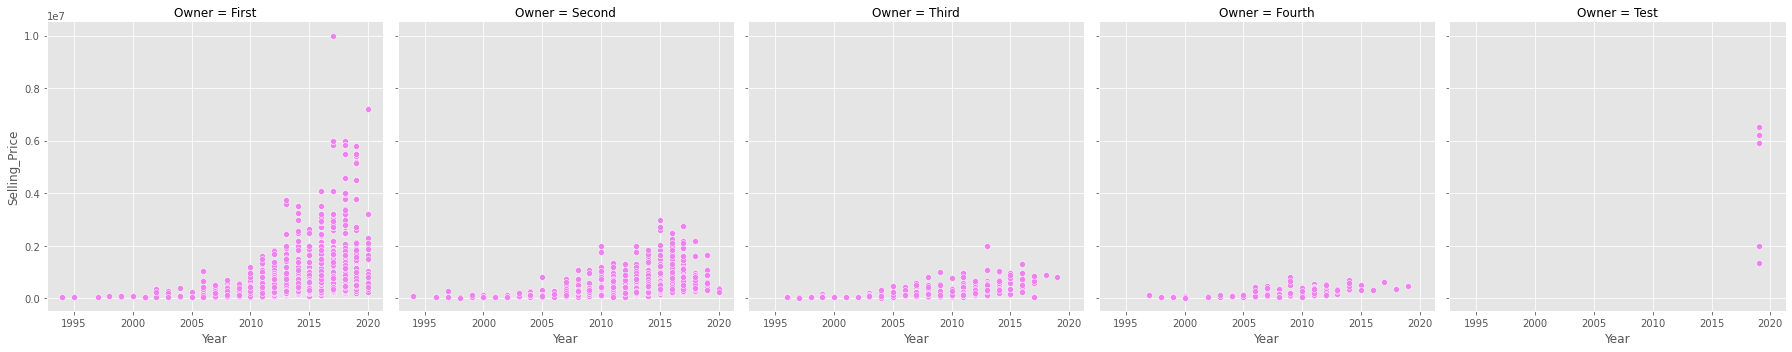

In [40]:
sn.relplot(data=df2, y='Selling_Price',x='Year', col='Owner', color='violet')

- Selling Price of 7 seater cars are more and density of 4 seater are more
- Selling Price of Automatic cars are more and Mileage range of Manual cars are more
- Selling Price of Diesel cars are more but mileage od Petrol cars are more
- Location (State_Code & City_Code) do not affect much 
- More the owners less is the Selling Price
- less kilometer the car has run more is the Selling Price
- car's age, Engine, Mileage, Seats, Owner, Transmission, km_Driven affects most on Selling Price.

<h3>Correlation Matrix</h3>

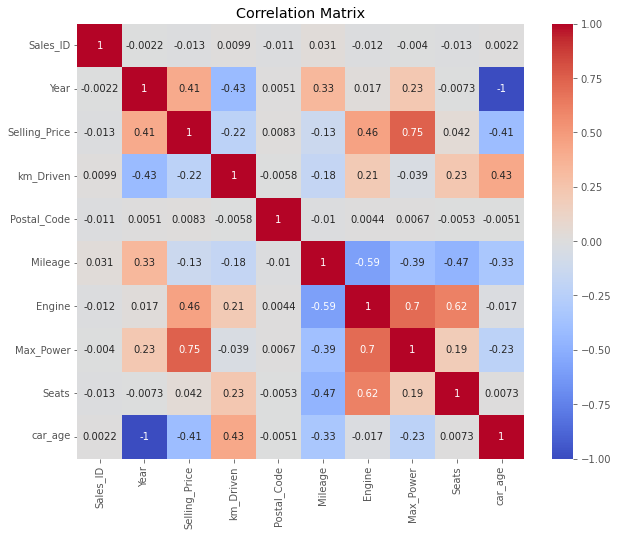

In [41]:
correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

In [42]:
target_column = 'Selling_Price'

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Find the correlation with the target column
correlation_with_target_column = correlation_matrix[target_column].drop(target_column)

# Find the top correlated columns
top_correlated_columns = correlation_with_target_column.abs().nlargest(7)

print("Top correlated columns with", target_column, ":")
print(top_correlated_columns)


Top correlated columns with Selling_Price :
Max_Power    0.749194
Engine       0.455077
Year         0.412429
car_age      0.412429
km_Driven    0.222696
Mileage      0.128868
Seats        0.041865
Name: Selling_Price, dtype: float64


In [43]:
df3 = df2.drop(['Sales_ID','Name','Year','Postal_Code'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7889 entries, 0 to 7905
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  7889 non-null   int64  
 1   km_Driven      7889 non-null   int64  
 2   City_Code      7889 non-null   object 
 3   State_Code     7889 non-null   object 
 4   Fuel           7889 non-null   object 
 5   Seller_Type    7889 non-null   object 
 6   Transmission   7889 non-null   object 
 7   Owner          7889 non-null   object 
 8   Mileage        7889 non-null   float64
 9   Engine         7889 non-null   int32  
 10  Max_Power      7889 non-null   float64
 11  Seats          7889 non-null   int64  
 12  Brand_name     7889 non-null   object 
 13  Model_name     7889 non-null   object 
 14  car_age        7889 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(8)
memory usage: 1.2+ MB


<h1>MODEL CREATION</h1>

In [44]:
df4 = pd.get_dummies(
        df3,
        columns = df3.select_dtypes(include=["object"]).columns.tolist(),
        drop_first=True,
    )

In [45]:
df4.head()

,Selling_Price,km_Driven,Mileage,Engine,Max_Power,Seats,car_age,City_Code_CT02,City_Code_CT03,City_Code_CT04,...,Model_name_XUV500,Model_name_Xcent,Model_name_Xenon,Model_name_Xylo,Model_name_Yaris,Model_name_Yeti,Model_name_Zen,Model_name_Zest,Model_name_i10,Model_name_i20
0,450000,145500,23.40,1248,74.00,5,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,370000,120000,21.14,1498,103.52,5,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,158000,140000,17.70,1497,78.00,5,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,225000,127000,23.00,1396,90.00,5,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,130000,120000,16.10,1298,88.20,5,16,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X = df4.drop(['Selling_Price'], axis=1)
y = df4['Selling_Price']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [48]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.9170882508099696

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.93569006, 0.93170903, 0.93767884, 0.87889816, 0.95495549])

In [50]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR

# def find_best_model_using_GSV(X,y):
#     algos = {
#         'linear_regression' : {
#             'model': LinearRegression(),
#         'params': {
#                 'normalize': [True, False]
#             }
#         },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1,2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'criterion' : ['mse','friedman_mse'],
#                 'splitter': ['best','random']
#             }
#         },
#         'random_Forest': {
#             'model': RandomForestRegressor(),
#             'params':{
#                 'n_estimators': [10, 50, 100],
#                 'max_depth': [None, 5, 10]
#             }
#         },
#         'SVM': {
#             'model': SVR(),
#             'params':{
#                 'C': [0.1, 1, 10],
#                 'kernel': ['linear', 'rbf']
#             }
#         }
#     }

#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X,y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# find_best_model_using_GSV(X,y)